In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
import seaborn as sns


## Sensory Representations

In [3]:
def all_sensory_reps_4_colors():
    import statistics
    uniques = []
    invalids = []
    all_reps = []
    for i in range(1,5):
        for j in range(1,5):
            for k in range(1,5):
                for l in range(1,5):
                    new_rep = [i,j,k,l]
                    all_reps.append(new_rep)

                    sorted_rep = list(set(new_rep))
                    sorted_rep.sort()
                    sorted_copy = sorted_rep.copy()[:-1]
                    sorted_copy.insert(0,0)
                    diff = [a - b for a, b in zip(sorted_rep, sorted_copy)]

                    if statistics.mean(diff) == 1:
                        uniques.append(new_rep)
                    else:
                        invalids.append(new_rep)        
    return uniques


def all_sensory_reps_3_colors():
    import statistics
    uniques = []
    invalids = []
    all_reps = []
    for i in range(1,4):
        for j in range(1,4):
            for k in range(1,4):
                new_rep = [i,j,k]
                all_reps.append(new_rep)

                sorted_rep = list(set(new_rep))
                sorted_rep.sort()
                sorted_copy = sorted_rep.copy()[:-1]
                sorted_copy.insert(0,0)
                diff = [a - b for a, b in zip(sorted_rep, sorted_copy)]

                if statistics.mean(diff) == 1:
                    uniques.append(new_rep)
                else:
                    invalids.append(new_rep)        
    return uniques


def remove_tie_sensory_reps(all_reps):
    new_all_reps = []
    for rep in all_reps:
        if len(rep) == len(set(rep)):
            new_all_reps.append(rep)
    return new_all_reps


def averaged_sensory_reps(stimulus, all_reps):
    marginal_probs = [marginal_prob(stimulus, rep) for rep in all_reps]
    
    all_reps_df = pd.DataFrame(data=all_reps, columns=['a_i','b_i','c_i','d_i'])
    all_reps_df['marginal_probs'] = marginal_probs
    all_reps_df['weighted_marginal_probs'] = all_reps_df.groupby('a_i')['marginal_probs'].transform(lambda x: x/x.sum())
    
    new_colnames = []
    for colname in ['a_i','b_i','c_i','d_i']:
        all_reps_df[colname + '_weighted'] = all_reps_df[colname] * all_reps_df['weighted_marginal_probs']
        new_colnames.append(colname + '_weighted')
    
    averaged_df = all_reps_df.groupby(['a_i']).mean().reset_index()
    averaged_df = averaged_df[new_colnames].apply(round, args=(5,))
    averaged_list = averaged_df.values.tolist()
    
    for i in range(len(averaged_list)):
        rep = averaged_list[i]
        rep_corrected = pd.Series(rep).rank(method='dense')
        averaged_list[i] = rep_corrected.values.tolist()
        
    return averaged_list
    

print('All Sensory Representations for 3 colors:')
print(all_sensory_reps_3_colors())
print('Number of unique sensory representations:', len(all_sensory_reps_3_colors()))

print()
print('All sensory representations for 4 colors:')
print(all_sensory_reps_4_colors())
print('Number of unique sensory representations:', len(all_sensory_reps_4_colors()))

print()
print('No tie representations for 4 colors:')
test = remove_tie_sensory_reps(all_sensory_reps_4_colors())
print(test)
print('Number of unique sensory representations:', len(test))

print()
print('Averaged no tie representations for 4 colors:')
test = averaged_sensory_reps([16,11,11,11], remove_tie_sensory_reps(all_sensory_reps_4_colors()))
print(test)
print('Number of unique sensory representations:', len(test))
    

All Sensory Representations for 3 colors:
[[1, 1, 1], [1, 1, 2], [1, 2, 1], [1, 2, 2], [1, 2, 3], [1, 3, 2], [2, 1, 1], [2, 1, 2], [2, 1, 3], [2, 2, 1], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
Number of unique sensory representations: 13

All sensory representations for 4 colors:
[[1, 1, 1, 1], [1, 1, 1, 2], [1, 1, 2, 1], [1, 1, 2, 2], [1, 1, 2, 3], [1, 1, 3, 2], [1, 2, 1, 1], [1, 2, 1, 2], [1, 2, 1, 3], [1, 2, 2, 1], [1, 2, 2, 2], [1, 2, 2, 3], [1, 2, 3, 1], [1, 2, 3, 2], [1, 2, 3, 3], [1, 2, 3, 4], [1, 2, 4, 3], [1, 3, 1, 2], [1, 3, 2, 1], [1, 3, 2, 2], [1, 3, 2, 3], [1, 3, 2, 4], [1, 3, 3, 2], [1, 3, 4, 2], [1, 4, 2, 3], [1, 4, 3, 2], [2, 1, 1, 1], [2, 1, 1, 2], [2, 1, 1, 3], [2, 1, 2, 1], [2, 1, 2, 2], [2, 1, 2, 3], [2, 1, 3, 1], [2, 1, 3, 2], [2, 1, 3, 3], [2, 1, 3, 4], [2, 1, 4, 3], [2, 2, 1, 1], [2, 2, 1, 2], [2, 2, 1, 3], [2, 2, 2, 1], [2, 2, 3, 1], [2, 3, 1, 1], [2, 3, 1, 2], [2, 3, 1, 3], [2, 3, 1, 4], [2, 3, 2, 1], [2, 3, 3, 1], [2, 3, 4, 1], [2, 4, 1, 3], [2, 4, 3, 1], [3, 1, 1, 2

NameError: name 'marginal_prob' is not defined

## Conditional Probabilities

In [4]:
def pop_conditional_with_dom(rep):
    conditional_prob = 0
    terms = [('sensory_rep:', rep)] # terms of the conditional prob calculation; for user clarity
    
    answer = rep[0] #aka activation value of a (the dominant color)
    possible_alternatives = rep[1:] #aka activation values of nondominant colors (b,c for 3 cols; b,c,d for 4 cols)
    
    for alt in possible_alternatives:
        if answer == alt:
            acc_rate = 1/2
        elif answer > alt:
            acc_rate = 0
        elif answer < alt:
            acc_rate = 1
        
        prob_of_getting_current_alt = 1/len(possible_alternatives)
        
        conditional_prob += (prob_of_getting_current_alt)*(acc_rate)
        terms.append((prob_of_getting_current_alt, acc_rate))
        
    return round(conditional_prob, 10)


def sum_conditional_with_dom(rep):
    conditional_prob = 0
    terms = [('sensory_rep:', rep)] # terms of the conditional prob calculation; for user clarity
  
    idx_1s = [i for i,val in enumerate(rep) if val==1] #vector of indexes where elements of rep equal 1
    n_1s = len(idx_1s) #how many 1s are in rep
    idx_not1s = [i for i,val in enumerate(rep) if val!=1] #vector of indexes where elements of rep are not 1
  
    # Each element that equals 1 takes turns being 1, and the rest are 4...
    for i in idx_1s:
        temp_rep = [4]*len(rep)
        temp_rep[i] = 1

        #... except for the elements that are not 1. Their activations in temp_rep are the same as in rep
        for idx in idx_not1s:
            temp_rep[idx] = rep[idx]

        answer = temp_rep[0] #aka activation value of a (dominant color)   
        possible_alternatives = temp_rep[1:] #aka activation values of nondominant colors 
            
        # Calculate conditional prob for each combination of a and another element
        for alt in possible_alternatives:
            
            # If activation of a is 1, then model is always correct
            if answer == 1:
                acc_rate = 1

            # If activation of alternative is 1, then model is always wrong
            elif alt == 1:
                acc_rate = 0

            # If neither activation of a or alternative is 1, then coin-toss accuracy
            elif answer!=1 and alt!=1:
                acc_rate = 1/2
            
            prob_of_getting_current_alt = 1/len(possible_alternatives)
            
            conditional_prob += (prob_of_getting_current_alt)*(1/n_1s)*(acc_rate)
            terms.append((prob_of_getting_current_alt, 1/n_1s, acc_rate))
    
    return round(conditional_prob, 10)


def pop_conditional_without_dom(rep):
    conditional_prob = 0
    terms = [('sensory_rep:', rep)] # terms of the conditional prob calculation; for user clarity
    
    if len(rep) == 3:
        possible_option_combinations_idxs = [(1,2)]
    elif len(rep) == 4:
        possible_option_combinations_idxs = [(1,2), (1,3), (2,3)]
    
    for answer_idx, alt_idx in possible_option_combinations_idxs:
        
        answer = rep[answer_idx] #aka activation value of current answer (a nondominant color)
        alt = rep[alt_idx] #aka activation value of alternative (another nondominant color)
        
        if answer == alt:
            acc_rate = 1/2
        elif answer > alt:
            acc_rate = 0
        elif answer < alt:
            acc_rate = 1
            
        prob_of_getting_current_options = 1/len(possible_option_combinations_idxs) #1 for 3 colors, 1/3 for 4 colors
        
        conditional_prob += (prob_of_getting_current_options)*(acc_rate)
        terms.append((prob_of_getting_current_options, acc_rate))
        
    return round(conditional_prob, 10)


def sum_conditional_without_dom(rep):
    conditional_prob = 0
    terms = [('sensory_rep:', rep)] # terms of the conditional prob calculation; for user clarity
    
    if len(rep) == 3:
        possible_option_combinations_idxs = [(1,2)]
    elif len(rep) == 4:
        possible_option_combinations_idxs = [(1,2), (1,3), (2,3)]
    
    for answer_idx, alt_idx in possible_option_combinations_idxs:
        
        idx_1s = [i for i,val in enumerate(rep) if val==1] #vector of indexes where elements of rep equal 1
        n_1s = len(idx_1s) #how many 1s are in rep
        idx_not1s = [i for i,val in enumerate(rep) if val!=1] #vector of indexes where elements of rep are not 1
        
        # Each element that equals 1 takes turns being 1, and the rest are 4...
        for i in idx_1s:
            temp_rep = [4,4,4,4]
            temp_rep[i] = 1

            #... except for the elements that are not 1. Their activations in temp_rep are the same as in rep
            for idx in idx_not1s:
                temp_rep[idx] = rep[idx]
            
            answer = temp_rep[answer_idx] #aka activation value of current answer (a nondominant color)   
            alt = temp_rep[alt_idx] #aka activation value of alternative (another nondominant color)
            
            # If activation of current answer is 1, then model is always correct
            if answer == 1:
                acc_rate = 1

            # If activation of alternative is 1, then model is always wrong
            elif alt == 1:
                acc_rate = 0

            # If neither activation of answer or alternative is 1, then coin-toss accuracy
            elif answer!=1 and alt!=1:
                acc_rate = 1/2
            
            prob_of_getting_current_options = 1/len(possible_option_combinations_idxs) #1 for 3 colors, 1/3 for 4
            
            conditional_prob += (prob_of_getting_current_options)*(1/n_1s)*(acc_rate)
            terms.append(('options: ', (answer, alt), 'terms: ', (prob_of_getting_current_options, 1/n_1s, acc_rate)))
    
    return round(conditional_prob, 10)


## Marginal Probabilities

In [5]:
# def marginal_probs(stimulus):
#     n_colors = len(stimulus)
    
#     df = pd.DataFrame()
#     df['n_circles'] = stimulus*n_colors
#     if n_colors == 3:
#         df['letters'] = ['a','b','c']*n_colors
#     elif n_colors == 4:
#         df['letters'] = ['a','b','c','d']*n_colors
#     df = df.sort_values(by=['letters'])
#     df['activations'] = list(range(1,n_colors+1))*n_colors
#     probs = []
#     
#     # Iterate over mappings 
#     for letter, act, i in zip(df['letters'], df['activations'], df['n_circles']):

#         # ...to generate marginal probabilies P(a_1), P(a_2),...
#         df_no_i = df[df.letters != letter].groupby(['letters']).mean().reset_index()
#         val = 0
#         n = sum(stimulus)

#         # Formulas for marginal probabilities
#         if act == 1:
#             val = i/n
#         elif act == 2:  
#             for j in df_no_i['n_circles']:
#                 val += j/n * i/(n-j)
#         elif act == 3:
#             for j, j_letter in zip(df_no_i['n_circles'], df_no_i['letters']):
#                 df_no_ij = df_no_i[df_no_i.letters != j_letter]
#                 for k in df_no_ij['n_circles']:
#                     val += j/n * k/(n-j) * i/(n-j-k)
#         elif act == 4:
#             for j, j_letter in zip(df_no_i['n_circles'], df_no_i['letters']):
#                 df_no_ij = df_no_i[df_no_i.letters != j_letter]
#                 for k, k_letter in zip(df_no_ij['n_circles'], df_no_ij['letters']):
#                     df_no_ijk = df_no_ij[df_no_ij.letters != k_letter]
#                     for l in df_no_ijk['n_circles']:
#                         val += j/n * k/(n-j) * l/(n-j-k) * i/(n-j-k-l)
#         probs.append(val)
#     
#     df['probs'] = probs
#     return df


def marginal_prob(stimulus, rep):
    n_circles = sum(stimulus)
    prob_dom = [n_circles_per_color/n_circles for n_circles_per_color in stimulus]
    
    ordered_prob_dom = [prob for _, prob in sorted(zip(rep, prob_dom))]
    
    answer = 1
    prev_prob = 0
    prev_denominator = 1
    for prob in ordered_prob_dom:
        numerator = prob
        denominator = prev_denominator - prev_prob
        
        answer *= numerator/denominator
        
        prev_denominator = denominator
        prev_prob = prob
    
    return answer

print(marginal_prob([16,11,11,11], [1,4,2,3]))

a = 16/49
x = 11/49
pr = (a)*(x/(1-a))*(x/(1-a-x))*(x/(1-a-x-x))
print(pr)
    

0.05442176870748296
0.05442176870748296


## Difference in Accuracies

In [6]:
def diff_accuracy(stimulus, condition, remove_tie_reps=True, use_averaged_sensory_reps=False):
    n_colors = len(stimulus)
    
    if n_colors == 3:
        all_reps = all_sensory_reps_3_colors()
        rep_cols = ['a_i','b_i','c_i']
    elif n_colors == 4:
        all_reps = all_sensory_reps_4_colors()
        rep_cols = ['a_i','b_i','c_i','d_i']
    
    if remove_tie_reps:
        all_reps = remove_tie_sensory_reps(all_reps)
    
    if use_averaged_sensory_reps:
        all_reps = averaged_sensory_reps(stimulus, all_reps)
    
    # Store all calculations for user clarity
    columns = ['sensory_rep'] + rep_cols + [
        'marginal_prob',
        'pop_conditional',
        'pop_cond_times_marg',
        'sum_conditional',
        'sum_cond_times_marg',
        'diff'
    ]
    calculation_table = pd.DataFrame(columns=columns)
    
    # Initialize pop and sum model accuracies
    pop_acc = 0
    sum_acc = 0
    
    # Iterate over all possible valid sensory representations
    for rep in all_reps:
        
        # Get conditional probabilities
        if condition == '2-alt-with-dom':
            pop_conditional = pop_conditional_with_dom(rep)
            sum_conditional = sum_conditional_with_dom(rep)
        elif condition == '2-alt-without-dom':
            pop_conditional = pop_conditional_without_dom(rep)
            sum_conditional = sum_conditional_without_dom(rep)
        
        # Get marginal probability for this sensory representation
        mp = marginal_prob(stimulus, rep)
        
        # Calculate accuracy difference for this specific sensory representation
        pop_cond_times_marginal = pop_conditional*mp
        sum_cond_times_marginal = sum_conditional*mp
        diff = pop_cond_times_marginal - sum_cond_times_marginal
        
        # Update pop and sum model accuracies
        pop_acc += pop_cond_times_marginal
        sum_acc += sum_cond_times_marginal
        
        # Add relevant values as a row in calculation_table
        row = [rep] + rep + [
            mp, 
            pop_conditional, 
            pop_cond_times_marginal, 
            sum_conditional, 
            sum_cond_times_marginal,
            diff]
        calculation_table.loc[len(calculation_table.index)] = row
    
    calculation_table['pop_acc'] = pop_acc
    calculation_table['sum_acc'] = sum_acc
    
    # Calculate summed difference in accuracy across all sensory representations
    diff_accuracy = round(calculation_table['diff'].sum(), 10)
    
    # Ensure the sum of all marginal probabilities is 1
    sum_marg_probs = round(calculation_table['marginal_prob'].sum(), 10)
    
    # Make summary table
    summary_table = pd.Series(
        data = [stimulus, condition, pop_acc, sum_acc, diff_accuracy, sum_marg_probs], 
        index = ['stimulus','condition','pop_acc','sum_acc','diff_acc','sum_marg_probs']
    )
    return calculation_table, summary_table


stimulus          [20, 18, 8, 3]
condition         2-alt-with-dom
pop_acc                 0.703389
sum_acc                 0.605442
diff_acc               0.0979467
sum_marg_probs                 1
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1, 2, 3, 4]",1,2,3,4,0.184249,1.000000,0.184249,1.000000,0.184249,0.000000,0.703389,0.605442
1,"[1, 2, 4, 3]",1,2,4,3,0.069093,1.000000,0.069093,1.000000,0.069093,0.000000,0.703389,0.605442
2,"[1, 3, 2, 4]",1,3,2,4,0.096512,1.000000,0.096512,1.000000,0.096512,0.000000,0.703389,0.605442
3,"[1, 3, 4, 2]",1,3,4,2,0.029232,1.000000,0.029232,1.000000,0.029232,0.000000,0.703389,0.605442
4,"[1, 4, 2, 3]",1,4,2,3,0.016085,1.000000,0.016085,1.000000,0.016085,0.000000,0.703389,0.605442
5,"[1, 4, 3, 2]",1,4,3,2,0.012992,1.000000,0.012992,1.000000,0.012992,0.000000,0.703389,0.605442
6,"[2, 1, 3, 4]",2,1,3,4,0.172362,0.666667,0.114908,0.333333,0.057454,0.057454,0.703389,0.605442
7,"[2, 1, 4, 3]",2,1,4,3,0.064636,0.666667,0.043091,0.333333,0.021545,0.021545,0.703389,0.605442
8,"[2, 3, 1, 4]",2,3,1,4,0.068264,0.666667,0.045509,0.333333,0.022755,0.022755,0.703389,0.605442
9,"[2, 3, 4, 1]",2,3,4,1,0.018429,0.666667,0.012286,0.333333,0.006143,0.006143,0.703389,0.605442


,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
a_i,,,,,,,,
1,0.068027,1.000000,0.068027,1.000000,0.068027,0.000000,0.703389,0.605442
2,0.057210,0.666667,0.038140,0.333333,0.019070,0.019070,0.703389,0.605442
3,0.033193,0.333333,0.011064,0.333333,0.011064,0.000000,0.703389,0.605442
4,0.008236,0.000000,0.000000,0.333333,0.002745,-0.002745,0.703389,0.605442


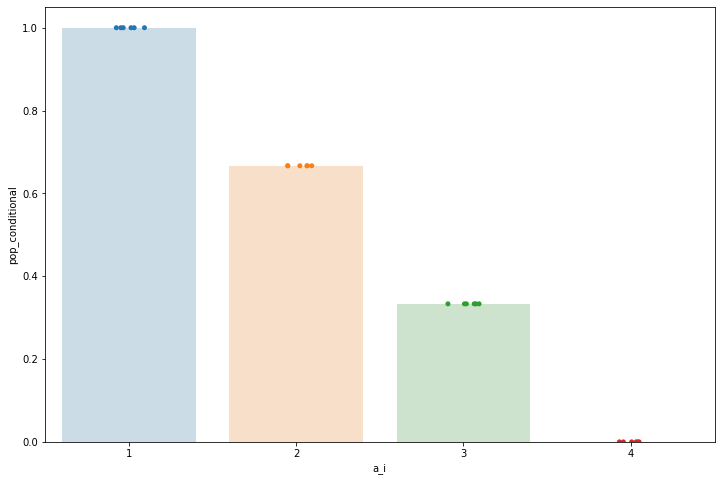

stimulus          [20, 18, 8, 3]
condition         2-alt-with-dom
pop_acc                 0.326635
sum_acc                 0.273303
diff_acc               0.0533324
sum_marg_probs          0.451411
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1.0, 2.0, 3.0, 4.0]",1.0,2.0,3.0,4.0,0.184249,1.000000,0.184249,1.000000,0.184249,0.000000,0.326635,0.273303
1,"[2.0, 1.0, 3.0, 4.0]",2.0,1.0,3.0,4.0,0.172362,0.666667,0.114908,0.333333,0.057454,0.057454,0.326635,0.273303
2,"[3.0, 1.0, 2.0, 4.0]",3.0,1.0,2.0,4.0,0.082434,0.333333,0.027478,0.333333,0.027478,0.000000,0.326635,0.273303
3,"[4.0, 1.0, 2.0, 3.0]",4.0,1.0,2.0,3.0,0.012365,0.000000,0.000000,0.333333,0.004122,-0.004122,0.326635,0.273303


stimulus             [20, 18, 8, 3]
condition         2-alt-without-dom
pop_acc                    0.758908
sum_acc                    0.602041
diff_acc                   0.156867
sum_marg_probs                    1
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1, 2, 3, 4]",1,2,3,4,0.184249,1.000000,0.184249,0.500000,0.092125,0.092125,0.758908,0.602041
1,"[1, 2, 4, 3]",1,2,4,3,0.069093,0.666667,0.046062,0.500000,0.034547,0.011516,0.758908,0.602041
2,"[1, 3, 2, 4]",1,3,2,4,0.096512,0.666667,0.064341,0.500000,0.048256,0.016085,0.758908,0.602041
3,"[1, 3, 4, 2]",1,3,4,2,0.029232,0.333333,0.009744,0.500000,0.014616,-0.004872,0.758908,0.602041
4,"[1, 4, 2, 3]",1,4,2,3,0.016085,0.333333,0.005362,0.500000,0.008043,-0.002681,0.758908,0.602041
5,"[1, 4, 3, 2]",1,4,3,2,0.012992,0.000000,0.000000,0.500000,0.006496,-0.006496,0.758908,0.602041
6,"[2, 1, 3, 4]",2,1,3,4,0.172362,1.000000,0.172362,0.833333,0.143635,0.028727,0.758908,0.602041
7,"[2, 1, 4, 3]",2,1,4,3,0.064636,0.666667,0.043091,0.833333,0.053863,-0.010773,0.758908,0.602041
8,"[2, 3, 1, 4]",2,3,1,4,0.068264,0.666667,0.045509,0.500000,0.034132,0.011377,0.758908,0.602041
9,"[2, 3, 4, 1]",2,3,4,1,0.018429,0.333333,0.006143,0.166667,0.003071,0.003071,0.758908,0.602041


,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
a_i,,,,,,,,
1,0.068027,0.5,0.051626,0.5,0.034014,0.017613,0.758908,0.602041
2,0.057210,0.5,0.045150,0.5,0.040293,0.004857,0.758908,0.602041
3,0.033193,0.5,0.024786,0.5,0.021325,0.003461,0.758908,0.602041
4,0.008236,0.5,0.004923,0.5,0.004709,0.000214,0.758908,0.602041


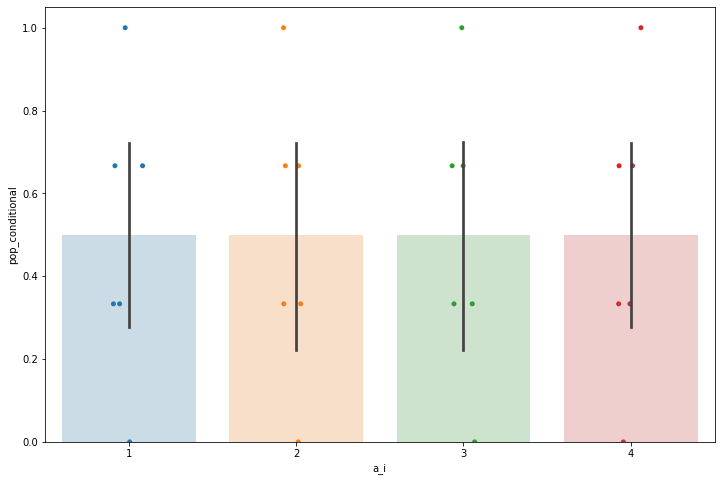

stimulus             [20, 18, 8, 3]
condition         2-alt-without-dom
pop_acc                    0.451411
sum_acc                    0.314759
diff_acc                   0.136652
sum_marg_probs             0.451411
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1.0, 2.0, 3.0, 4.0]",1.0,2.0,3.0,4.0,0.184249,1.0,0.184249,0.500000,0.092125,0.092125,0.451411,0.314759
1,"[2.0, 1.0, 3.0, 4.0]",2.0,1.0,3.0,4.0,0.172362,1.0,0.172362,0.833333,0.143635,0.028727,0.451411,0.314759
2,"[3.0, 1.0, 2.0, 4.0]",3.0,1.0,2.0,4.0,0.082434,1.0,0.082434,0.833333,0.068695,0.013739,0.451411,0.314759
3,"[4.0, 1.0, 2.0, 3.0]",4.0,1.0,2.0,3.0,0.012365,1.0,0.012365,0.833333,0.010304,0.002061,0.451411,0.314759


stimulus          [22, 20, 6, 1]
condition         2-alt-with-dom
pop_acc                 0.755349
sum_acc                 0.632653
diff_acc                0.122695
sum_marg_probs                 1
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1, 2, 3, 4]",1,2,3,4,0.285066,1.000000,0.285066,1.000000,0.285066,0.000000,0.755349,0.632653
1,"[1, 2, 4, 3]",1,2,4,3,0.047511,1.000000,0.047511,1.000000,0.047511,0.000000,0.755349,0.632653
2,"[1, 3, 2, 4]",1,3,2,4,0.095022,1.000000,0.095022,1.000000,0.095022,0.000000,0.755349,0.632653
3,"[1, 3, 4, 2]",1,3,4,2,0.012791,1.000000,0.012791,1.000000,0.012791,0.000000,0.755349,0.632653
4,"[1, 4, 2, 3]",1,4,2,3,0.004751,1.000000,0.004751,1.000000,0.004751,0.000000,0.755349,0.632653
5,"[1, 4, 3, 2]",1,4,3,2,0.003837,1.000000,0.003837,1.000000,0.003837,0.000000,0.755349,0.632653
6,"[2, 1, 3, 4]",2,1,3,4,0.265407,0.666667,0.176938,0.333333,0.088469,0.088469,0.755349,0.632653
7,"[2, 1, 4, 3]",2,1,4,3,0.044234,0.666667,0.029490,0.333333,0.014745,0.014745,0.755349,0.632653
8,"[2, 3, 1, 4]",2,3,1,4,0.059665,0.666667,0.039777,0.333333,0.019888,0.019888,0.755349,0.632653
9,"[2, 3, 4, 1]",2,3,4,1,0.007195,0.666667,0.004797,0.333333,0.002398,0.002398,0.755349,0.632653


,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
a_i,,,,,,,,
1,0.074830,1.000000,0.074830,1.000000,0.074830,0.000000,0.755349,0.632653
2,0.063607,0.666667,0.042405,0.333333,0.021202,0.021202,0.755349,0.632653
3,0.025970,0.333333,0.008657,0.333333,0.008657,0.000000,0.755349,0.632653
4,0.002259,0.000000,0.000000,0.333333,0.000753,-0.000753,0.755349,0.632653


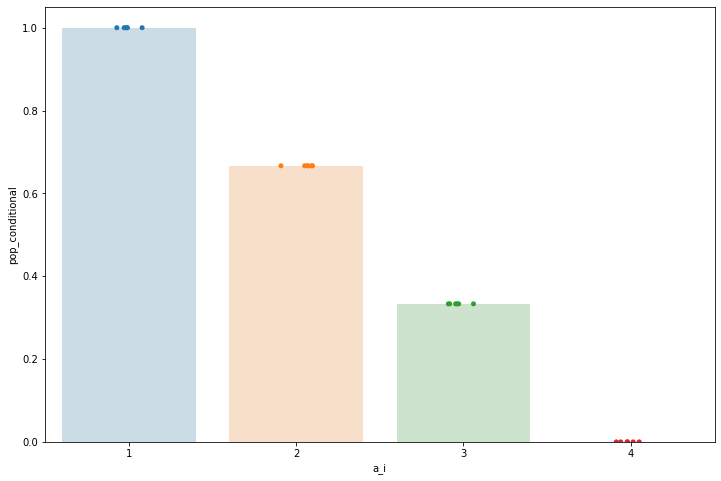

stimulus          [22, 20, 6, 1]
condition         2-alt-with-dom
pop_acc                 0.488929
sum_acc                 0.401684
diff_acc                0.087245
sum_marg_probs          0.634921
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1.0, 2.0, 3.0, 4.0]",1.0,2.0,3.0,4.0,0.285066,1.000000,0.285066,1.000000,0.285066,0.000000,0.488929,0.401684
1,"[2.0, 1.0, 3.0, 4.0]",2.0,1.0,3.0,4.0,0.265407,0.666667,0.176938,0.333333,0.088469,0.088469,0.488929,0.401684
2,"[3.0, 1.0, 2.0, 4.0]",3.0,1.0,2.0,4.0,0.080776,0.333333,0.026925,0.333333,0.026925,0.000000,0.488929,0.401684
3,"[4.0, 1.0, 2.0, 3.0]",4.0,1.0,2.0,3.0,0.003672,0.000000,0.000000,0.333333,0.001224,-0.001224,0.488929,0.401684


stimulus             [22, 20, 6, 1]
condition         2-alt-without-dom
pop_acc                    0.859585
sum_acc                    0.629252
diff_acc                   0.230333
sum_marg_probs                    1
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1, 2, 3, 4]",1,2,3,4,0.285066,1.000000,0.285066,0.500000,0.142533,0.142533,0.859585,0.629252
1,"[1, 2, 4, 3]",1,2,4,3,0.047511,0.666667,0.031674,0.500000,0.023756,0.007919,0.859585,0.629252
2,"[1, 3, 2, 4]",1,3,2,4,0.095022,0.666667,0.063348,0.500000,0.047511,0.015837,0.859585,0.629252
3,"[1, 3, 4, 2]",1,3,4,2,0.012791,0.333333,0.004264,0.500000,0.006396,-0.002132,0.859585,0.629252
4,"[1, 4, 2, 3]",1,4,2,3,0.004751,0.333333,0.001584,0.500000,0.002376,-0.000792,0.859585,0.629252
5,"[1, 4, 3, 2]",1,4,3,2,0.003837,0.000000,0.000000,0.500000,0.001919,-0.001919,0.859585,0.629252
6,"[2, 1, 3, 4]",2,1,3,4,0.265407,1.000000,0.265407,0.833333,0.221172,0.044234,0.859585,0.629252
7,"[2, 1, 4, 3]",2,1,4,3,0.044234,0.666667,0.029490,0.833333,0.036862,-0.007372,0.859585,0.629252
8,"[2, 3, 1, 4]",2,3,1,4,0.059665,0.666667,0.039777,0.500000,0.029833,0.009944,0.859585,0.629252
9,"[2, 3, 4, 1]",2,3,4,1,0.007195,0.333333,0.002398,0.166667,0.001199,0.001199,0.859585,0.629252


,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
a_i,,,,,,,,
1,0.074830,0.5,0.064323,0.5,0.037415,0.026908,0.859585,0.629252
2,0.063607,0.5,0.056344,0.5,0.048486,0.007858,0.859585,0.629252
3,0.025970,0.5,0.021198,0.5,0.017642,0.003557,0.859585,0.629252
4,0.002259,0.5,0.001399,0.5,0.001333,0.000066,0.859585,0.629252


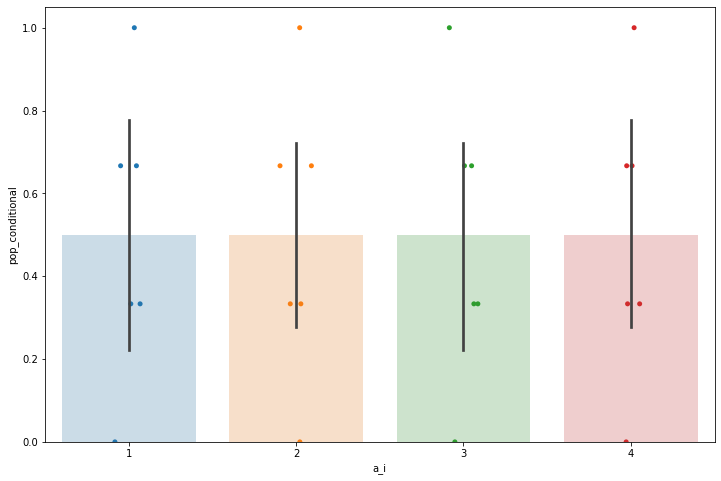

stimulus             [22, 20, 6, 1]
condition         2-alt-without-dom
pop_acc                    0.634921
sum_acc                    0.434078
diff_acc                   0.200842
sum_marg_probs             0.634921
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1.0, 2.0, 3.0, 4.0]",1.0,2.0,3.0,4.0,0.285066,1.0,0.285066,0.500000,0.142533,0.142533,0.634921,0.434078
1,"[2.0, 1.0, 3.0, 4.0]",2.0,1.0,3.0,4.0,0.265407,1.0,0.265407,0.833333,0.221172,0.044234,0.634921,0.434078
2,"[3.0, 1.0, 2.0, 4.0]",3.0,1.0,2.0,4.0,0.080776,1.0,0.080776,0.833333,0.067313,0.013463,0.634921,0.434078
3,"[4.0, 1.0, 2.0, 3.0]",4.0,1.0,2.0,3.0,0.003672,1.0,0.003672,0.833333,0.003060,0.000612,0.634921,0.434078


stimulus          [16, 11, 11, 11]
condition           2-alt-with-dom
pop_acc                   0.592593
sum_acc                    0.55102
diff_acc                 0.0415722
sum_marg_probs                   1
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1, 2, 3, 4]",1,2,3,4,0.054422,1.000000,0.054422,1.000000,0.054422,0.000000,0.592593,0.55102
1,"[1, 2, 4, 3]",1,2,4,3,0.054422,1.000000,0.054422,1.000000,0.054422,0.000000,0.592593,0.55102
2,"[1, 3, 2, 4]",1,3,2,4,0.054422,1.000000,0.054422,1.000000,0.054422,0.000000,0.592593,0.55102
3,"[1, 3, 4, 2]",1,3,4,2,0.054422,1.000000,0.054422,1.000000,0.054422,0.000000,0.592593,0.55102
4,"[1, 4, 2, 3]",1,4,2,3,0.054422,1.000000,0.054422,1.000000,0.054422,0.000000,0.592593,0.55102
5,"[1, 4, 3, 2]",1,4,3,2,0.054422,1.000000,0.054422,1.000000,0.054422,0.000000,0.592593,0.55102
6,"[2, 1, 3, 4]",2,1,3,4,0.047261,0.666667,0.031507,0.333333,0.015754,0.015754,0.592593,0.55102
7,"[2, 1, 4, 3]",2,1,4,3,0.047261,0.666667,0.031507,0.333333,0.015754,0.015754,0.592593,0.55102
8,"[2, 3, 1, 4]",2,3,1,4,0.047261,0.666667,0.031507,0.333333,0.015754,0.015754,0.592593,0.55102
9,"[2, 3, 4, 1]",2,3,4,1,0.047261,0.666667,0.031507,0.333333,0.015754,0.015754,0.592593,0.55102


,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
a_i,,,,,,,,
1,0.054422,1.000000,0.054422,1.000000,0.054422,0.000000,0.592593,0.55102
2,0.047261,0.666667,0.031507,0.333333,0.015754,0.015754,0.592593,0.55102
3,0.038509,0.333333,0.012836,0.333333,0.012836,0.000000,0.592593,0.55102
4,0.026475,0.000000,0.000000,0.333333,0.008825,-0.008825,0.592593,0.55102


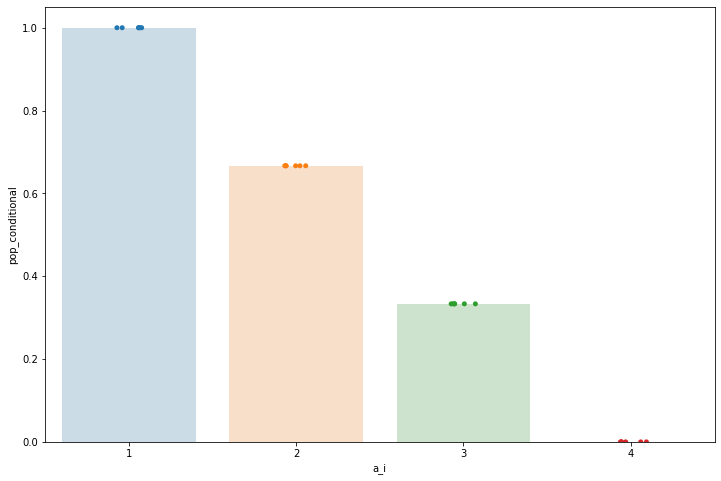

stimulus          [16, 11, 11, 11]
condition           2-alt-with-dom
pop_acc                   0.108844
sum_acc                   0.126493
diff_acc                -0.0176499
sum_marg_probs            0.161793
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1.0, 2.0, 2.0, 2.0]",1.0,2.0,2.0,2.0,0.054422,1.0,0.054422,1.000000,0.054422,0.000000,0.108844,0.126493
1,"[1.0, 2.0, 2.0, 2.0]",1.0,2.0,2.0,2.0,0.054422,1.0,0.054422,1.000000,0.054422,0.000000,0.108844,0.126493
2,"[2.0, 1.0, 1.0, 1.0]",2.0,1.0,1.0,1.0,0.026475,0.0,0.000000,0.333333,0.008825,-0.008825,0.108844,0.126493
3,"[2.0, 1.0, 1.0, 1.0]",2.0,1.0,1.0,1.0,0.026475,0.0,0.000000,0.333333,0.008825,-0.008825,0.108844,0.126493


stimulus           [16, 11, 11, 11]
condition         2-alt-without-dom
pop_acc                         0.5
sum_acc                         0.5
diff_acc                         -0
sum_marg_probs                    1
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1, 2, 3, 4]",1,2,3,4,0.054422,1.000000,0.054422,0.500000,0.027211,0.027211,0.5,0.5
1,"[1, 2, 4, 3]",1,2,4,3,0.054422,0.666667,0.036281,0.500000,0.027211,0.009070,0.5,0.5
2,"[1, 3, 2, 4]",1,3,2,4,0.054422,0.666667,0.036281,0.500000,0.027211,0.009070,0.5,0.5
3,"[1, 3, 4, 2]",1,3,4,2,0.054422,0.333333,0.018141,0.500000,0.027211,-0.009070,0.5,0.5
4,"[1, 4, 2, 3]",1,4,2,3,0.054422,0.333333,0.018141,0.500000,0.027211,-0.009070,0.5,0.5
5,"[1, 4, 3, 2]",1,4,3,2,0.054422,0.000000,0.000000,0.500000,0.027211,-0.027211,0.5,0.5
6,"[2, 1, 3, 4]",2,1,3,4,0.047261,1.000000,0.047261,0.833333,0.039384,0.007877,0.5,0.5
7,"[2, 1, 4, 3]",2,1,4,3,0.047261,0.666667,0.031507,0.833333,0.039384,-0.007877,0.5,0.5
8,"[2, 3, 1, 4]",2,3,1,4,0.047261,0.666667,0.031507,0.500000,0.023631,0.007877,0.5,0.5
9,"[2, 3, 4, 1]",2,3,4,1,0.047261,0.333333,0.015754,0.166667,0.007877,0.007877,0.5,0.5


,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
a_i,,,,,,,,
1,0.054422,0.5,0.027211,0.5,0.027211,-1.734723e-18,0.5,0.5
2,0.047261,0.5,0.023631,0.5,0.023631,-8.673617e-19,0.5,0.5
3,0.038509,0.5,0.019254,0.5,0.019254,-2.168404e-18,0.5,0.5
4,0.026475,0.5,0.013237,0.5,0.013237,-1.590163e-18,0.5,0.5


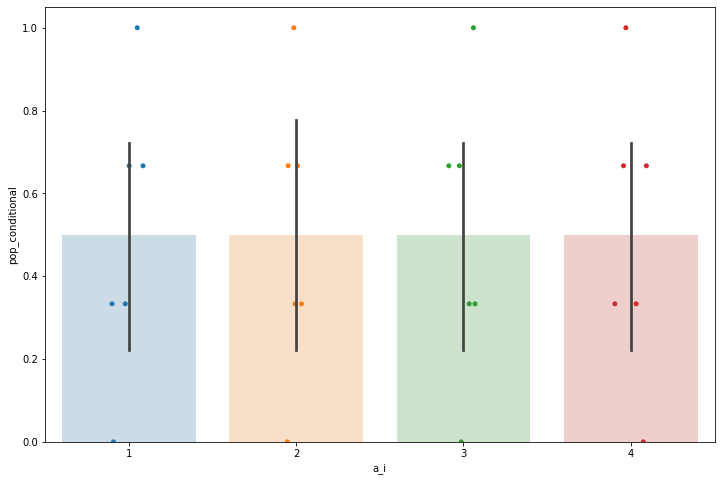

stimulus           [16, 11, 11, 11]
condition         2-alt-without-dom
pop_acc                   0.0808967
sum_acc                   0.0808967
diff_acc                          0
sum_marg_probs             0.161793
dtype: object

,sensory_rep,a_i,b_i,c_i,d_i,marginal_prob,pop_conditional,pop_cond_times_marg,sum_conditional,sum_cond_times_marg,diff,pop_acc,sum_acc
0,"[1.0, 2.0, 2.0, 2.0]",1.0,2.0,2.0,2.0,0.054422,0.5,0.027211,0.5,0.027211,0.0,0.080897,0.080897
1,"[1.0, 2.0, 2.0, 2.0]",1.0,2.0,2.0,2.0,0.054422,0.5,0.027211,0.5,0.027211,0.0,0.080897,0.080897
2,"[2.0, 1.0, 1.0, 1.0]",2.0,1.0,1.0,1.0,0.026475,0.5,0.013237,0.5,0.013237,0.0,0.080897,0.080897
3,"[2.0, 1.0, 1.0, 1.0]",2.0,1.0,1.0,1.0,0.026475,0.5,0.013237,0.5,0.013237,0.0,0.080897,0.080897


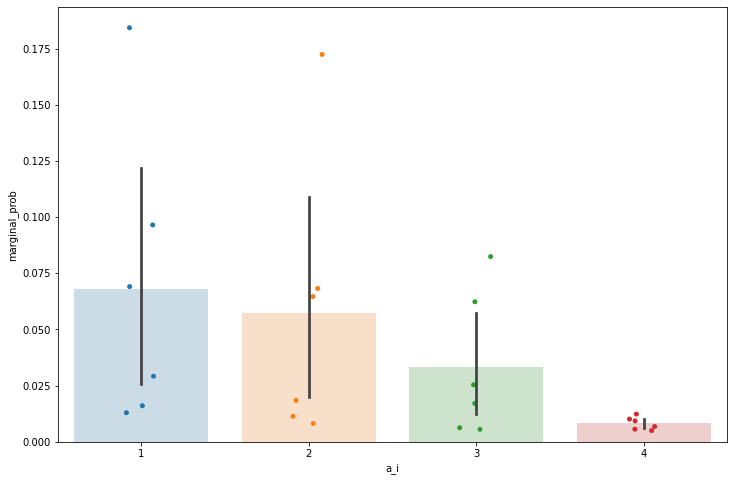

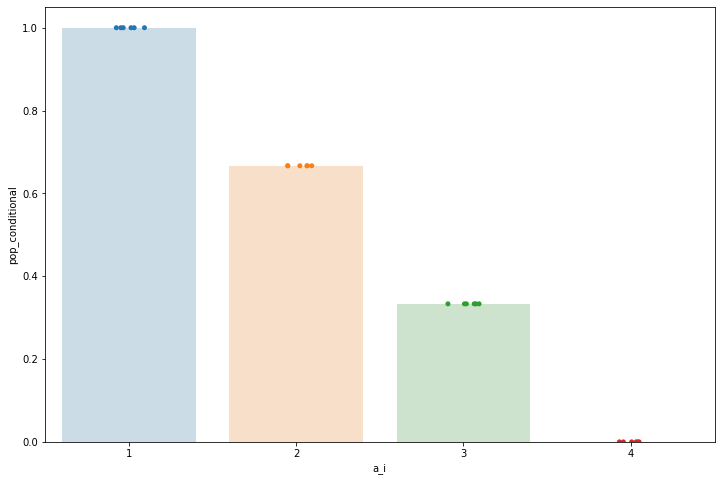

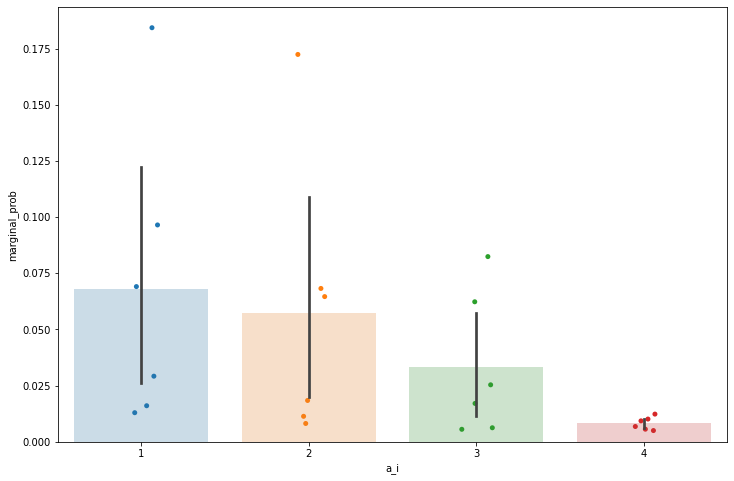

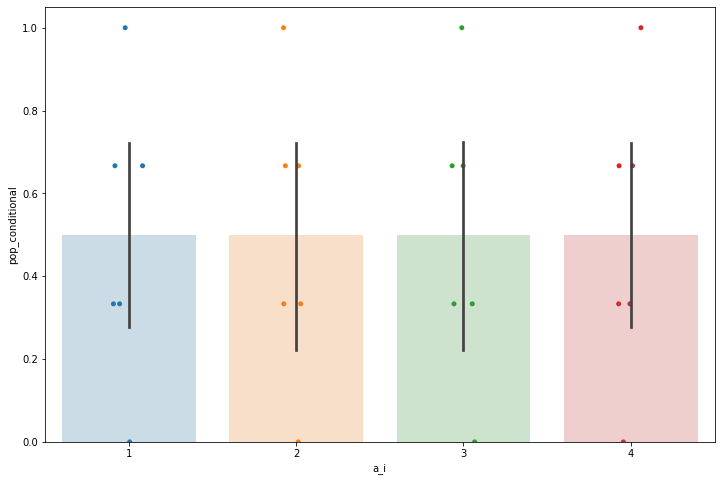

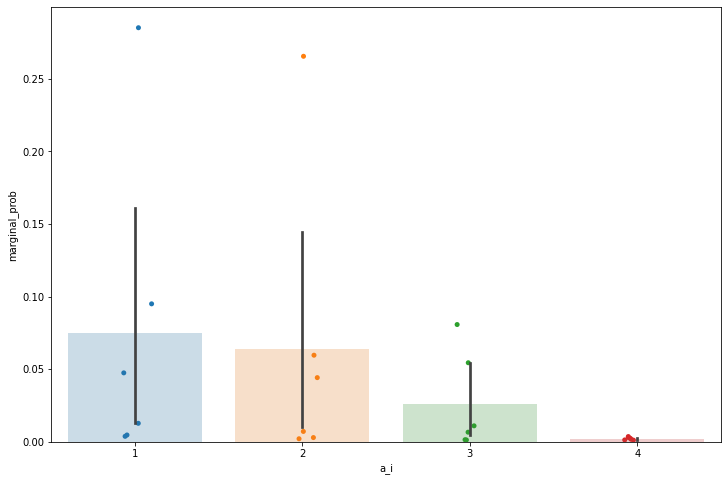

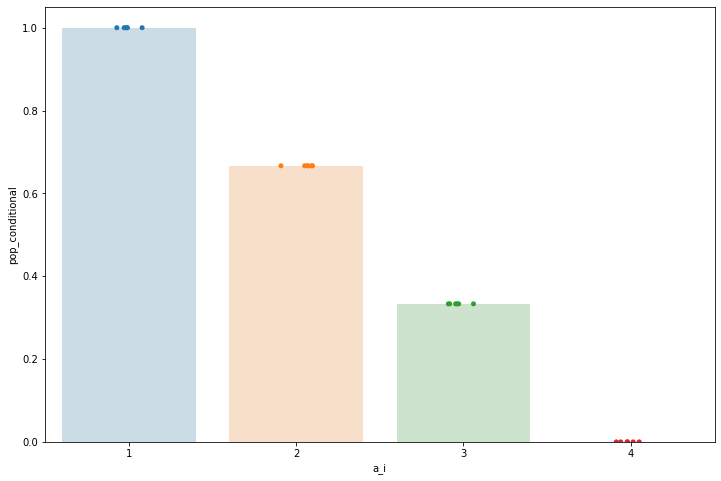

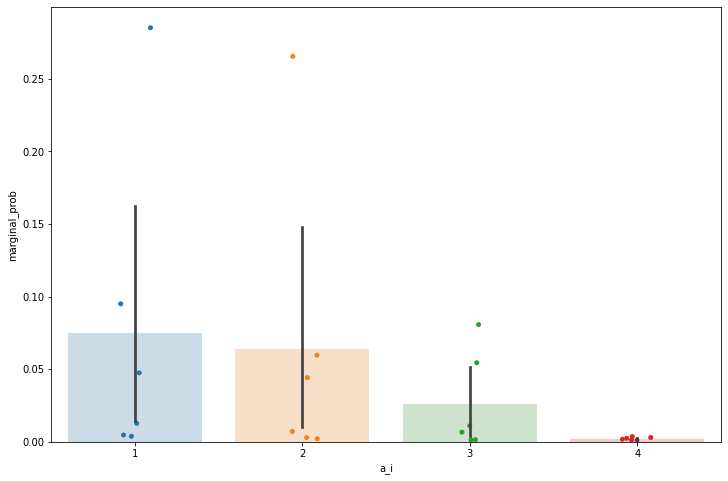

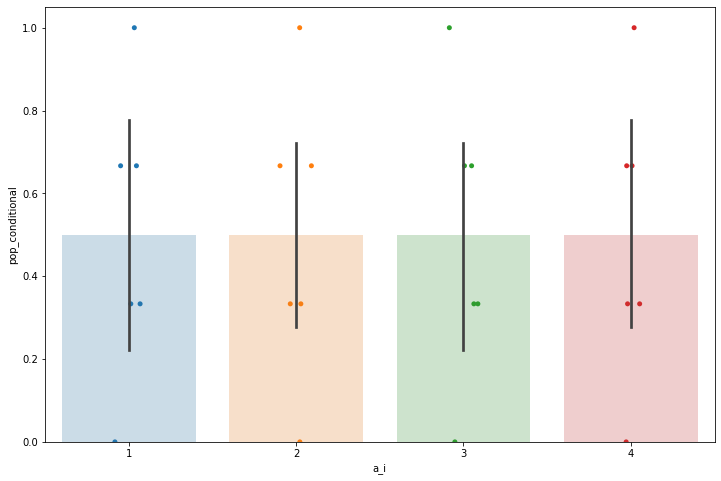

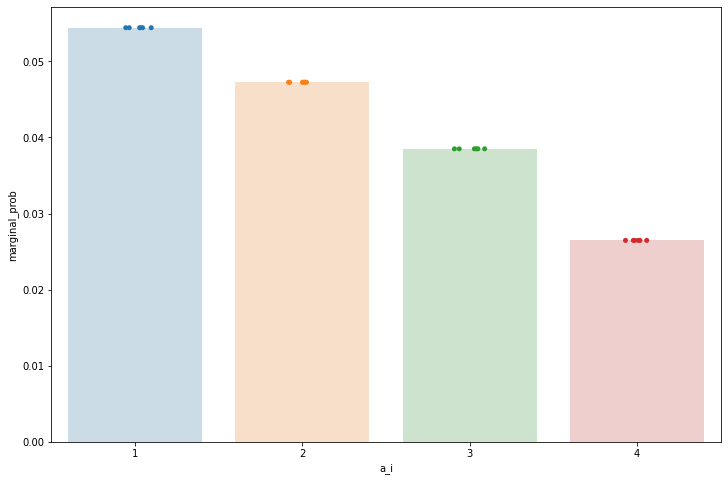

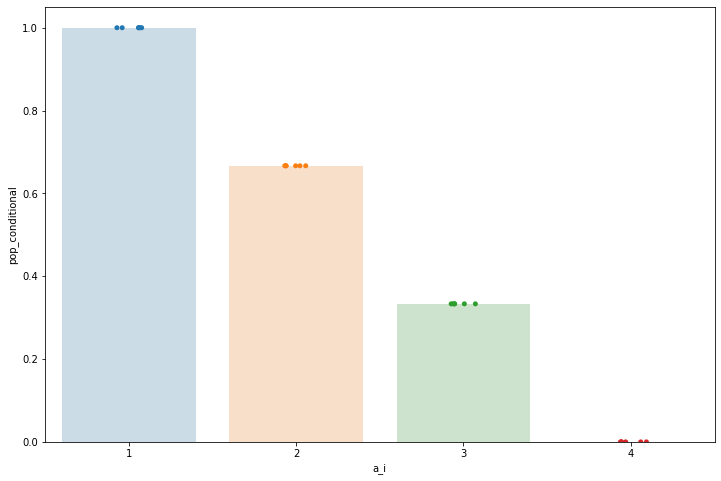

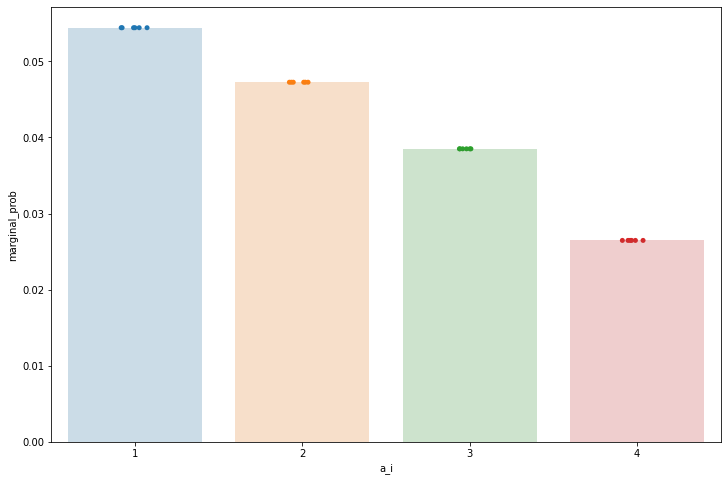

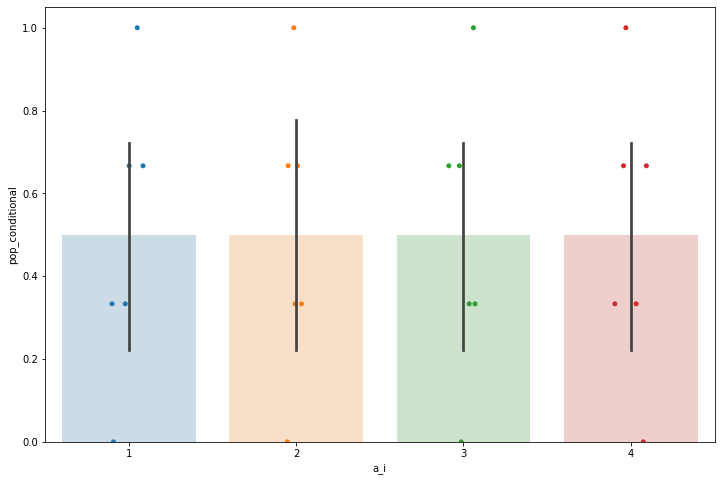

In [7]:
# Test cases
test_reps =[[20,18,8,3], [22,20,6,1], [16,11,11,11]]
conditions = ['2-alt-with-dom', '2-alt-without-dom']

for rep in test_reps:
    for condition in conditions:
        calculation_table, summary_table = diff_accuracy(rep, condition)
        display(summary_table)
        display(calculation_table)
        display(calculation_table.groupby(['a_i']).mean())
        
        # Initialize the figure
        fig = plt.figure(figsize=(12,8))
        sns.despine(bottom=True, left=True)

        # Show each observation with a scatterplot
        sns.stripplot(x="a_i", y="marginal_prob", data=calculation_table, zorder=1)
        sns.barplot(x="a_i", y="marginal_prob", data=calculation_table, zorder=1, alpha=0.25)
        
        # Initialize the figure
        fig = plt.figure(figsize=(12,8))
        sns.despine(bottom=True, left=True)

        # Show each observation with a scatterplot
        sns.stripplot(x="a_i", y="pop_conditional", data=calculation_table, zorder=1)
        sns.barplot(x="a_i", y="pop_conditional", data=calculation_table, zorder=1, alpha=0.25)
        display(fig)
        
        # Use averaged sensory reps
        calculation_table, summary_table = diff_accuracy(rep, condition, use_averaged_sensory_reps=True)
        display(summary_table)
        display(calculation_table)
        
        

## Simulating Model Accuracies with Binomial Distribution

In [15]:
from scipy.stats import ttest_ind
pvals = []

pop_n = 168*2
sum_n = 336*2

for i in range(10000):
    # Population Model
    pop_1s = np.random.binomial(n=pop_n, p=0.592593)
    pop_sim = np.zeros(pop_n)
    pop_sim[:pop_1s] = 1
    df1 = pd.DataFrame(data=list(zip(pop_sim, ['pop']*pop_n)))

    # Summary Model
    sum_1s = np.random.binomial(n=sum_n, p=0.55102)
    sum_sim = np.zeros(sum_n)
    sum_sim[:sum_1s] = 1
    df2 = pd.DataFrame(data=list(zip(sum_sim, ['sum']*sum_n)))

    df = pd.concat([df1,df2], ignore_index=True, axis=0)
    df.columns = ['acc','model']

    # display(sns.barplot(data=df, x='model', y='acc'))
    tstat, pvalue = ttest_ind(pop_sim, sum_sim)
    pvals.append(pvalue)

filtered = list(filter(lambda pvalue: pvalue <= 0.05, pvals))
print(len(filtered)/len(pvals))


0.2394


## Maximizing Difference in Model Predictions


In [353]:
def max_diff(n, condition):
    cols = ['a','b','c','d','diff_accuracy','rounded']
    max_df = pd.DataFrame(columns = cols)

    for a in range(1,n+1):
        for b in range(1,n+1):
            for c in range(1,n+1):
                d = n-a-b-c
                if d >= 1 and max(a,b,c,d) == a:
                    _, summary_table = diff_accuracy([a,b,c,d],condition)
                    diff = summary_table['diff_acc']
                    row = [a,b,c,d, diff, round(diff,4)]
                    max_df.loc[len(max_df.index)] = row
                    print(row)
    
    print(max_df)
    max_df = max_df.sort_values(by=['diff_accuracy'], ascending=False)
    return max_df

max_df = max_diff(49, '2-alt-without-dom')


[13, 10, 13, 13, -0.0230700976, -0.0231]
[13, 11, 12, 13, -0.0141964902, -0.0142]
[13, 11, 13, 12, -0.0076658779, -0.0077]
[13, 12, 11, 13, -0.0065064577, -0.0065]
[13, 12, 12, 12, -0.0, -0.0]
[13, 12, 13, 11, 0.0076658779, 0.0077]
[13, 13, 10, 13, -0.0, -0.0]
[13, 13, 11, 12, 0.0065064577, 0.0065]
[13, 13, 12, 11, 0.0141964902, 0.0142]
[13, 13, 13, 10, 0.0230700976, 0.0231]
[14, 7, 14, 14, -0.0634920635, -0.0635]
[14, 8, 13, 14, -0.0504935981, -0.0505]
[14, 8, 14, 13, -0.0449506402, -0.045]
[14, 9, 12, 14, -0.0388483153, -0.0388]
[14, 9, 13, 13, -0.0333951763, -0.0334]
[14, 9, 14, 12, -0.0268127318, -0.0268]
[14, 10, 11, 14, -0.0285034014, -0.0285]
[14, 10, 12, 13, -0.023149149, -0.0231]
[14, 10, 13, 12, -0.0166185367, -0.0166]
[14, 10, 14, 11, -0.0089115646, -0.0089]
[14, 11, 10, 14, -0.0194331066, -0.0194]
[14, 11, 11, 13, -0.0141723356, -0.0142]
[14, 11, 12, 12, -0.0076900325, -0.0077]
[14, 11, 13, 11, -0.0, -0.0]
[14, 11, 14, 10, 0.0089115646, 0.0089]
[14, 12, 9, 14, -0.0116374309

[16, 13, 16, 4, 0.109769425, 0.1098]
[16, 14, 3, 16, -0.0036976194, -0.0037]
[16, 14, 4, 15, -0.0028430408, -0.0028]
[16, 14, 5, 14, -0.0, -0.0]
[16, 14, 6, 13, 0.0046332763, 0.0046]
[16, 14, 7, 12, 0.0109109771, 0.0109]
[16, 14, 8, 11, 0.0187305927, 0.0187]
[16, 14, 9, 10, 0.0280268477, 0.028]
[16, 14, 10, 9, 0.0387679862, 0.0388]
[16, 14, 11, 8, 0.0509540084, 0.051]
[16, 14, 12, 7, 0.0646166699, 0.0646]
[16, 14, 13, 6, 0.0798212462, 0.0798]
[16, 14, 14, 5, 0.0966702471, 0.0967]
[16, 14, 15, 4, 0.1153094834, 0.1153]
[16, 14, 16, 3, 0.1359371819, 0.1359]
[16, 15, 2, 16, -0.0007522722, -0.0008]
[16, 15, 3, 15, -0.0, -0.0]
[16, 15, 4, 14, 0.0028430408, 0.0028]
[16, 15, 5, 13, 0.007558579, 0.0076]
[16, 15, 6, 12, 0.0139833711, 0.014]
[16, 15, 7, 11, 0.0219991649, 0.022]
[16, 15, 8, 10, 0.0315258471, 0.0315]
[16, 15, 9, 9, 0.0425170068, 0.0425]
[16, 15, 10, 8, 0.0549574419, 0.055]
[16, 15, 11, 7, 0.0688623546, 0.0689]
[16, 15, 12, 6, 0.0842781557, 0.0843]
[16, 15, 13, 5, 0.1012849584, 0.10

[17, 16, 11, 5, 0.1058358529, 0.1058]
[17, 16, 12, 4, 0.1255102041, 0.1255]
[17, 16, 13, 3, 0.1470077596, 0.147]
[17, 16, 14, 2, 0.1705026455, 0.1705]
[17, 16, 15, 1, 0.1962276846, 0.1962]
[17, 17, 1, 14, -0.0005754273, -0.0006]
[17, 17, 2, 13, 0.004368063, 0.0044]
[17, 17, 3, 12, 0.0113886934, 0.0114]
[17, 17, 4, 11, 0.0202947846, 0.0203]
[17, 17, 5, 10, 0.0309443643, 0.0309]
[17, 17, 6, 9, 0.0432370942, 0.0432]
[17, 17, 7, 8, 0.0571088435, 0.0571]
[17, 17, 8, 7, 0.0725283447, 0.0725]
[17, 17, 9, 6, 0.0894955976, 0.0895]
[17, 17, 10, 5, 0.10804187, 0.108]
[17, 17, 11, 4, 0.1282312925, 0.1282]
[17, 17, 12, 3, 0.1501642036, 0.1502]
[17, 17, 13, 2, 0.1739825755, 0.174]
[17, 17, 14, 1, 0.1998780875, 0.1999]
[18, 1, 12, 18, -0.2078355229, -0.2078]
[18, 1, 13, 17, -0.2043839758, -0.2044]
[18, 1, 14, 16, -0.2005735628, -0.2006]
[18, 1, 15, 15, -0.1964285715, -0.1964]
[18, 1, 16, 14, -0.1919567827, -0.192]
[18, 1, 17, 13, -0.1871504157, -0.1872]
[18, 1, 18, 12, -0.1819851828, -0.182]
[18, 2, 

[18, 15, 14, 2, 0.1697627327, 0.1698]
[18, 15, 15, 1, 0.1964285715, 0.1964]
[18, 16, 1, 14, 0.000120048, 0.0001]
[18, 16, 2, 13, 0.0042406235, 0.0042]
[18, 16, 3, 12, 0.0106337272, 0.0106]
[18, 16, 4, 11, 0.0190728143, 0.0191]
[18, 16, 5, 10, 0.0293912437, 0.0294]
[18, 16, 6, 9, 0.0414718615, 0.0415]
[18, 16, 7, 8, 0.0552400671, 0.0552]
[18, 16, 8, 7, 0.0706595682, 0.0707]
[18, 16, 9, 6, 0.0877303649, 0.0877]
[18, 16, 10, 5, 0.1064887494, 0.1065]
[18, 16, 11, 4, 0.1270093223, 0.127]
[18, 16, 12, 3, 0.1494092374, 0.1494]
[18, 16, 13, 2, 0.1738551359, 0.1739]
[18, 16, 14, 1, 0.2005735628, 0.2006]
[18, 17, 1, 13, 0.0003023432, 0.0003]
[18, 17, 2, 12, 0.0072533551, 0.0073]
[18, 17, 3, 11, 0.0163265306, 0.0163]
[18, 17, 4, 10, 0.0273368607, 0.0273]
[18, 17, 5, 9, 0.0401503259, 0.0402]
[18, 17, 6, 8, 0.0546761313, 0.0547]
[18, 17, 7, 7, 0.070861678, 0.0709]
[18, 17, 8, 6, 0.0886897368, 0.0887]
[18, 17, 9, 5, 0.1081775368, 0.1082]
[18, 17, 10, 4, 0.129377677, 0.1294]
[18, 17, 11, 3, 0.1523809

[19, 12, 13, 5, 0.0884158108, 0.0884]
[19, 12, 14, 4, 0.1086836444, 0.1087]
[19, 12, 15, 3, 0.1313681028, 0.1314]
[19, 12, 16, 2, 0.156840514, 0.1568]
[19, 12, 17, 1, 0.185608225, 0.1856]
[19, 13, 1, 16, -0.0010348967, -0.001]
[19, 13, 2, 15, -0.0035280779, -0.0035]
[19, 13, 3, 14, -0.003046589, -0.003]
[19, 13, 4, 13, -0.0, -0.0]
[19, 13, 5, 12, 0.0053105687, 0.0053]
[19, 13, 6, 11, 0.0126673476, 0.0127]
[19, 13, 7, 10, 0.0219192025, 0.0219]
[19, 13, 8, 9, 0.0329707641, 0.033]
[19, 13, 9, 8, 0.0457758861, 0.0458]
[19, 13, 10, 7, 0.0603345686, 0.0603]
[19, 13, 11, 6, 0.0766929579, 0.0767]
[19, 13, 12, 5, 0.094946423, 0.0949]
[19, 13, 13, 4, 0.1152460985, 0.1152]
[19, 13, 14, 3, 0.1378097535, 0.1378]
[19, 13, 15, 2, 0.1629385088, 0.1629]
[19, 13, 16, 1, 0.191041934, 0.191]
[19, 14, 1, 15, -0.0003332942, -0.0003]
[19, 14, 2, 14, -0.0, -0.0]
[19, 14, 3, 13, 0.003046589, 0.003]
[19, 14, 4, 12, 0.0084743299, 0.0085]
[19, 14, 5, 11, 0.0160392052, 0.016]
[19, 14, 6, 10, 0.0255668934, 0.0256]


[20, 8, 10, 11, -0.0323626527, -0.0324]
[20, 8, 11, 10, -0.0232923579, -0.0233]
[20, 8, 12, 9, -0.01252501, -0.0125]
[20, 8, 13, 8, -0.0, -0.0]
[20, 8, 14, 7, 0.0144094001, 0.0144]
[20, 8, 15, 6, 0.0309080154, 0.0309]
[20, 8, 16, 5, 0.0497994069, 0.0498]
[20, 8, 17, 4, 0.0715192744, 0.0715]
[20, 8, 18, 3, 0.0966890253, 0.0967]
[20, 8, 19, 2, 0.1262030738, 0.1262]
[20, 8, 20, 1, 0.1613756614, 0.1614]
[20, 9, 1, 19, -0.0081632653, -0.0082]
[20, 9, 2, 18, -0.021603793, -0.0216]
[20, 9, 3, 17, -0.0301936159, -0.0302]
[20, 9, 4, 16, -0.034945055, -0.0349]
[20, 9, 5, 15, -0.0365646259, -0.0366]
[20, 9, 6, 14, -0.035551612, -0.0356]
[20, 9, 7, 13, -0.0322588126, -0.0323]
[20, 9, 8, 12, -0.0269307723, -0.0269]
[20, 9, 9, 11, -0.0197278912, -0.0197]
[20, 9, 10, 10, -0.0107411386, -0.0107]
[20, 9, 11, 9, -0.0, -0.0]
[20, 9, 12, 8, 0.01252501, 0.0125]
[20, 9, 13, 7, 0.0269248609, 0.0269]
[20, 9, 14, 6, 0.0433599527, 0.0434]
[20, 9, 15, 5, 0.0620748299, 0.0621]
[20, 9, 16, 4, 0.083422292, 0.0834]


[21, 3, 18, 7, -0.085170068, -0.0852]
[21, 3, 19, 6, -0.0696928468, -0.0697]
[21, 3, 20, 5, -0.0512496303, -0.0512]
[21, 3, 21, 4, -0.0286734694, -0.0287]
[21, 4, 3, 21, -0.098877551, -0.0989]
[21, 4, 4, 20, -0.1133786848, -0.1134]
[21, 4, 5, 19, -0.1223955766, -0.1224]
[21, 4, 6, 18, -0.1274891775, -0.1275]
[21, 4, 7, 17, -0.1296382189, -0.1296]
[21, 4, 8, 16, -0.1294784581, -0.1295]
[21, 4, 9, 15, -0.1274305269, -0.1274]
[21, 4, 10, 14, -0.1237717309, -0.1238]
[21, 4, 11, 13, -0.118677471, -0.1187]
[21, 4, 12, 12, -0.112244898, -0.1122]
[21, 4, 13, 11, -0.1045051354, -0.1045]
[21, 4, 14, 10, -0.0954270597, -0.0954]
[21, 4, 15, 9, -0.0849135201, -0.0849]
[21, 4, 16, 8, -0.0727891157, -0.0728]
[21, 4, 17, 7, -0.0587765409, -0.0588]
[21, 4, 18, 6, -0.0424551639, -0.0425]
[21, 4, 19, 5, -0.0231892274, -0.0232]
[21, 4, 20, 4, -0.0, -0.0]
[21, 4, 21, 3, 0.0286734694, 0.0287]
[21, 5, 2, 21, -0.0599731532, -0.06]
[21, 5, 3, 20, -0.0794809228, -0.0795]
[21, 5, 4, 19, -0.0921612607, -0.0922]
[

[21, 16, 11, 1, 0.2147710936, 0.2148]
[21, 17, 1, 10, 0.0073753407, 0.0074]
[21, 17, 2, 9, 0.0223786239, 0.0224]
[21, 17, 3, 8, 0.0396846011, 0.0397]
[21, 17, 4, 7, 0.0591372913, 0.0591]
[21, 17, 5, 6, 0.0806377887, 0.0806]
[21, 17, 6, 5, 0.1041380979, 0.1041]
[21, 17, 7, 4, 0.1296382189, 0.1296]
[21, 17, 8, 3, 0.1571861472, 0.1572]
[21, 17, 9, 2, 0.1868807884, 0.1869]
[21, 17, 10, 1, 0.2188781237, 0.2189]
[21, 18, 1, 9, 0.0101205395, 0.0101]
[21, 18, 2, 8, 0.0294086866, 0.0294]
[21, 18, 3, 7, 0.0508843538, 0.0509]
[21, 18, 4, 6, 0.074427953, 0.0744]
[21, 18, 5, 5, 0.099970423, 0.1]
[21, 18, 6, 4, 0.1274891775, 0.1275]
[21, 18, 7, 3, 0.1570068027, 0.157]
[21, 18, 8, 2, 0.18859236, 0.1886]
[21, 18, 9, 1, 0.2223654374, 0.2224]
[21, 19, 1, 8, 0.013441673, 0.0134]
[21, 19, 2, 7, 0.0376184662, 0.0376]
[21, 19, 3, 6, 0.0638878582, 0.0639]
[21, 19, 4, 5, 0.0921612607, 0.0922]
[21, 19, 5, 4, 0.1223955766, 0.1224]
[21, 19, 6, 3, 0.154590806, 0.1546]
[21, 19, 7, 2, 0.188790046, 0.1888]
[21, 19, 

[22, 9, 17, 1, 0.1757776615, 0.1758]
[22, 10, 1, 16, -0.0083403991, -0.0083]
[22, 10, 2, 15, -0.0156595972, -0.0157]
[22, 10, 3, 14, -0.0186664409, -0.0187]
[22, 10, 4, 13, -0.0181376899, -0.0181]
[22, 10, 5, 12, -0.0146179684, -0.0146]
[22, 10, 6, 11, -0.008486728, -0.0085]
[22, 10, 7, 10, -0.0, -0.0]
[22, 10, 8, 9, 0.0106838057, 0.0107]
[22, 10, 9, 8, 0.0234889277, 0.0235]
[22, 10, 10, 7, 0.0384153662, 0.0384]
[22, 10, 11, 6, 0.0555388822, 0.0555]
[22, 10, 12, 5, 0.075017886, 0.075]
[22, 10, 13, 4, 0.0971084086, 0.0971]
[22, 10, 14, 3, 0.1221899016, 0.1222]
[22, 10, 15, 2, 0.1508069895, 0.1508]
[22, 10, 16, 1, 0.1837364317, 0.1837]
[22, 11, 1, 15, -0.0053745857, -0.0054]
[22, 11, 2, 14, -0.0092072214, -0.0092]
[22, 11, 3, 13, -0.0092120181, -0.0092]
[22, 11, 4, 12, -0.0059992113, -0.006]
[22, 11, 5, 11, -0.0, -0.0]
[22, 11, 6, 10, 0.008486728, 0.0085]
[22, 11, 7, 9, 0.0192649282, 0.0193]
[22, 11, 8, 8, 0.0322234157, 0.0322]
[22, 11, 9, 7, 0.0473261527, 0.0473]
[22, 11, 10, 6, 0.06460

[23, 5, 3, 18, -0.0831484768, -0.0831]
[23, 5, 4, 17, -0.0939325225, -0.0939]
[23, 5, 5, 16, -0.0997732426, -0.0998]
[23, 5, 6, 15, -0.101886209, -0.1019]
[23, 5, 7, 14, -0.101056212, -0.1011]
[23, 5, 8, 13, -0.0977963835, -0.0978]
[23, 5, 9, 12, -0.0924369748, -0.0924]
[23, 5, 10, 11, -0.085175737, -0.0852]
[23, 5, 11, 10, -0.0761054422, -0.0761]
[23, 5, 12, 9, -0.0652260904, -0.0652]
[23, 5, 13, 8, -0.0524449096, -0.0524]
[23, 5, 14, 7, -0.0375641485, -0.0376]
[23, 5, 15, 6, -0.020253556, -0.0203]
[23, 5, 16, 5, -0.0, -0.0]
[23, 5, 17, 4, 0.0239813097, 0.024]
[23, 5, 18, 3, 0.052905945, 0.0529]
[23, 5, 19, 2, 0.0887188209, 0.0887]
[23, 5, 20, 1, 0.1346938776, 0.1347]
[23, 6, 1, 19, -0.0291836735, -0.0292]
[23, 6, 2, 18, -0.0517006803, -0.0517]
[23, 6, 3, 17, -0.0659913241, -0.066]
[23, 6, 4, 16, -0.0743970316, -0.0744]
[23, 6, 5, 15, -0.0783858998, -0.0784]
[23, 6, 6, 14, -0.0789115646, -0.0789]
[23, 6, 7, 13, -0.076604974, -0.0766]
[23, 6, 8, 12, -0.0718820862, -0.0719]
[23, 6, 9, 1

[24, 1, 16, 8, -0.17351385, -0.1735]
[24, 1, 17, 7, -0.1628873772, -0.1629]
[24, 1, 18, 6, -0.1508234873, -0.1508]
[24, 1, 19, 5, -0.1366780046, -0.1367]
[24, 1, 20, 4, -0.1192743764, -0.1193]
[24, 1, 21, 3, -0.0962430427, -0.0962]
[24, 1, 22, 2, -0.0620378586, -0.062]
[24, 1, 23, 1, 0.0, 0.0]
[24, 2, 1, 22, -0.0994528246, -0.0995]
[24, 2, 2, 21, -0.1461106182, -0.1461]
[24, 2, 3, 20, -0.1704363959, -0.1704]
[24, 2, 4, 19, -0.1835255842, -0.1835]
[24, 2, 5, 18, -0.1901212659, -0.1901]
[24, 2, 6, 17, -0.1925816093, -0.1926]
[24, 2, 7, 16, -0.1922015183, -0.1922]
[24, 2, 8, 15, -0.1897402439, -0.1897]
[24, 2, 9, 14, -0.1856598371, -0.1857]
[24, 2, 10, 13, -0.1802425318, -0.1802]
[24, 2, 11, 12, -0.1736514004, -0.1737]
[24, 2, 12, 11, -0.1659613678, -0.166]
[24, 2, 13, 10, -0.1571724342, -0.1572]
[24, 2, 14, 9, -0.1472096744, -0.1472]
[24, 2, 15, 8, -0.1359100162, -0.1359]
[24, 2, 16, 7, -0.1229912255, -0.123]
[24, 2, 17, 6, -0.1079912514, -0.108]
[24, 2, 18, 5, -0.090150843, -0.0902]
[24

[24, 15, 6, 4, 0.1264232009, 0.1264]
[24, 15, 7, 3, 0.1567511853, 0.1568]
[24, 15, 8, 2, 0.1897402439, 0.1897]
[24, 15, 9, 1, 0.2255952381, 0.2256]
[24, 16, 1, 8, 0.0185629808, 0.0186]
[24, 16, 2, 7, 0.0410299386, 0.041]
[24, 16, 3, 6, 0.0662098971, 0.0662]
[24, 16, 4, 5, 0.0939531368, 0.094]
[24, 16, 5, 4, 0.1241874528, 0.1242]
[24, 16, 6, 3, 0.1569128449, 0.1569]
[24, 16, 7, 2, 0.1922015183, 0.1922]
[24, 16, 8, 1, 0.2302031924, 0.2302]
[24, 17, 1, 7, 0.0245653817, 0.0246]
[24, 17, 2, 6, 0.053125827, 0.0531]
[24, 17, 3, 5, 0.0842764379, 0.0843]
[24, 17, 4, 4, 0.1179138322, 0.1179]
[24, 17, 5, 3, 0.154004329, 0.154]
[24, 17, 6, 2, 0.1925816093, 0.1926]
[24, 17, 7, 1, 0.2337490552, 0.2337]
[24, 18, 1, 6, 0.0317758683, 0.0318]
[24, 18, 2, 5, 0.0676722863, 0.0677]
[24, 18, 3, 4, 0.1060606061, 0.1061]
[24, 18, 4, 3, 0.1468769326, 0.1469]
[24, 18, 5, 2, 0.1901212659, 0.1901]
[24, 18, 6, 1, 0.2358575009, 0.2359]
[24, 19, 1, 5, 0.0408730159, 0.0409]
[24, 19, 2, 4, 0.0860199152, 0.086]
[24, 19

[25, 11, 8, 5, 0.0864610014, 0.0865]
[25, 11, 9, 4, 0.1109279609, 0.1109]
[25, 11, 10, 3, 0.1384964242, 0.1385]
[25, 11, 11, 2, 0.169544741, 0.1695]
[25, 11, 12, 1, 0.2046409422, 0.2046]
[25, 12, 1, 11, 0.0025804079, 0.0026]
[25, 12, 2, 10, 0.0094825809, 0.0095]
[25, 12, 3, 9, 0.0200680272, 0.0201]
[25, 12, 4, 8, 0.0339002268, 0.0339]
[25, 12, 5, 7, 0.0506957169, 0.0507]
[25, 12, 6, 6, 0.0702947846, 0.0703]
[25, 12, 7, 5, 0.0926458303, 0.0926]
[25, 12, 8, 4, 0.1178004535, 0.1178]
[25, 12, 9, 3, 0.1459183674, 0.1459]
[25, 12, 10, 2, 0.1772830344, 0.1773]
[25, 12, 11, 1, 0.2123309748, 0.2123]
[25, 13, 1, 10, 0.0078244737, 0.0078]
[25, 13, 2, 9, 0.0192537621, 0.0193]
[25, 13, 3, 8, 0.0340780252, 0.0341]
[25, 13, 4, 7, 0.0519644221, 0.052]
[25, 13, 5, 6, 0.0727070201, 0.0727]
[25, 13, 6, 5, 0.0962073293, 0.0962]
[25, 13, 7, 4, 0.1224653498, 0.1225]
[25, 13, 8, 3, 0.1515795712, 0.1516]
[25, 13, 9, 2, 0.1837559266, 0.1838]
[25, 13, 10, 1, 0.2193272566, 0.2193]
[25, 14, 1, 9, 0.0133293897, 0.

[26, 9, 11, 3, 0.1210884354, 0.1211]
[26, 9, 12, 2, 0.1536796537, 0.1537]
[26, 9, 13, 1, 0.1914656772, 0.1915]
[26, 10, 1, 12, -0.0062080776, -0.0062]
[26, 10, 2, 11, -0.0054072911, -0.0054]
[26, 10, 3, 10, -0.0, -0.0]
[26, 10, 4, 9, 0.0092952161, 0.0093]
[26, 10, 5, 8, 0.0220070934, 0.022]
[26, 10, 6, 7, 0.0378497553, 0.0378]
[26, 10, 7, 6, 0.0566880598, 0.0567]
[26, 10, 8, 5, 0.0785220071, 0.0785]
[26, 10, 9, 4, 0.1034867388, 0.1035]
[26, 10, 10, 3, 0.1318681319, 0.1319]
[26, 10, 11, 2, 0.1641374499, 0.1641]
[26, 10, 12, 1, 0.2010132725, 0.201]
[26, 11, 1, 11, -0.0, -0.0]
[26, 11, 2, 10, 0.0054072911, 0.0054]
[26, 11, 3, 9, 0.0149659864, 0.015]
[26, 11, 4, 8, 0.0281298484, 0.0281]
[26, 11, 5, 7, 0.0445483749, 0.0445]
[26, 11, 6, 6, 0.0640256103, 0.064]
[26, 11, 7, 5, 0.0864984883, 0.0865]
[26, 11, 8, 4, 0.1120300752, 0.112]
[26, 11, 9, 3, 0.1408163265, 0.1408]
[26, 11, 10, 2, 0.1732077447, 0.1732]
[26, 11, 11, 1, 0.2097505669, 0.2098]
[26, 12, 1, 10, 0.0062080776, 0.0062]
[26, 12, 2,

[27, 9, 9, 4, 0.0941915228, 0.0942]
[27, 9, 10, 3, 0.1234886667, 0.1235]
[27, 9, 11, 2, 0.1571595072, 0.1572]
[27, 9, 12, 1, 0.1961276819, 0.1961]
[27, 10, 1, 11, -0.0036590394, -0.0037]
[27, 10, 2, 10, -0.0, -0.0]
[27, 10, 3, 9, 0.0083794651, 0.0084]
[27, 10, 4, 8, 0.0207860922, 0.0208]
[27, 10, 5, 7, 0.0367813792, 0.0368]
[27, 10, 6, 6, 0.056122449, 0.0561]
[27, 10, 7, 5, 0.0787314926, 0.0787]
[27, 10, 8, 4, 0.104686319, 0.1047]
[27, 10, 9, 3, 0.1342298053, 0.1342]
[27, 10, 10, 2, 0.1678004535, 0.1678]
[27, 10, 11, 1, 0.2060915275, 0.2061]
[27, 11, 1, 10, 0.0036590394, 0.0037]
[27, 11, 2, 9, 0.0123852338, 0.0124]
[27, 11, 3, 8, 0.0253881457, 0.0254]
[27, 11, 4, 7, 0.042149385, 0.0421]
[27, 11, 5, 6, 0.0623544873, 0.0624]
[27, 11, 6, 5, 0.0858547965, 0.0859]
[27, 11, 7, 4, 0.1126503127, 0.1127]
[27, 11, 8, 3, 0.1428896918, 0.1429]
[27, 11, 9, 2, 0.1768873983, 0.1769]
[27, 11, 10, 1, 0.2151618223, 0.2152]
[27, 12, 1, 9, 0.0110936682, 0.0111]
[27, 12, 2, 8, 0.025170068, 0.0252]
[27, 12,

[28, 12, 2, 7, 0.0363010701, 0.0363]
[28, 12, 3, 6, 0.0591836735, 0.0592]
[28, 12, 4, 5, 0.0858232182, 0.0858]
[28, 12, 5, 4, 0.1160575341, 0.1161]
[28, 12, 6, 3, 0.1498866213, 0.1499]
[28, 12, 7, 2, 0.1874726499, 0.1875]
[28, 12, 8, 1, 0.229158672, 0.2292]
[28, 13, 1, 7, 0.0270408163, 0.027]
[28, 13, 2, 6, 0.0526733501, 0.0527]
[28, 13, 3, 5, 0.0821523054, 0.0822]
[28, 13, 4, 4, 0.1152460985, 0.1152]
[28, 13, 5, 3, 0.1518801965, 0.1519]
[28, 13, 6, 2, 0.1921291324, 0.1921]
[28, 13, 7, 1, 0.2362244898, 0.2362]
[28, 14, 1, 6, 0.0376417234, 0.0376]
[28, 14, 2, 5, 0.0712943072, 0.0713]
[28, 14, 3, 4, 0.1085989952, 0.1086]
[28, 14, 4, 3, 0.1494153217, 0.1494]
[28, 14, 5, 2, 0.1937432868, 0.1937]
[28, 14, 6, 1, 0.241723356, 0.2417]
[28, 15, 1, 5, 0.0500283447, 0.05]
[28, 15, 2, 4, 0.093556721, 0.0936]
[28, 15, 3, 3, 0.1405895692, 0.1406]
[28, 15, 4, 2, 0.1910623899, 0.1911]
[28, 15, 5, 1, 0.2450396826, 0.245]
[28, 16, 1, 4, 0.0654261705, 0.0654]
[28, 16, 2, 3, 0.1218960099, 0.1219]
[28, 16,

[30, 1, 16, 2, -0.0661820284, -0.0662]
[30, 1, 17, 1, -0.0, -0.0]
[30, 2, 1, 16, -0.1258948024, -0.1259]
[30, 2, 2, 15, -0.1664665867, -0.1665]
[30, 2, 3, 14, -0.1845438175, -0.1845]
[30, 2, 4, 13, -0.1911831399, -0.1912]
[30, 2, 5, 12, -0.1910764306, -0.1911]
[30, 2, 6, 11, -0.1865130668, -0.1865]
[30, 2, 7, 10, -0.1786936997, -0.1787]
[30, 2, 8, 9, -0.16824548, -0.1682]
[30, 2, 9, 8, -0.155440358, -0.1554]
[30, 2, 10, 7, -0.1402783336, -0.1403]
[30, 2, 11, 6, -0.1224874565, -0.1225]
[30, 2, 12, 5, -0.1014405762, -0.1014]
[30, 2, 13, 4, -0.0759370415, -0.0759]
[30, 2, 14, 3, -0.043687475, -0.0437]
[30, 2, 15, 2, -0.0, -0.0]
[30, 2, 16, 1, 0.0661820284, 0.0662]
[30, 3, 1, 15, -0.0919784581, -0.092]
[30, 3, 2, 14, -0.124679872, -0.1247]
[30, 3, 3, 13, -0.1403061225, -0.1403]
[30, 3, 4, 12, -0.1459183674, -0.1459]
[30, 3, 5, 11, -0.1449829932, -0.145]
[30, 3, 6, 10, -0.1393467644, -0.1393]
[30, 3, 7, 9, -0.1300170068, -0.13]
[30, 3, 8, 8, -0.1175015461, -0.1175]
[30, 3, 9, 7, -0.10195578

[31, 7, 6, 5, 0.0421443636, 0.0421]
[31, 7, 7, 4, 0.0705009277, 0.0705]
[31, 7, 8, 3, 0.104102247, 0.1041]
[31, 7, 9, 2, 0.1438062599, 0.1438]
[31, 7, 10, 1, 0.1911355451, 0.1911]
[31, 8, 1, 9, -0.0067049042, -0.0067]
[31, 8, 2, 8, -0.0, -0.0]
[31, 8, 3, 7, 0.0133992991, 0.0134]
[31, 8, 4, 6, 0.0324263039, 0.0324]
[31, 8, 5, 5, 0.0565149137, 0.0565]
[31, 8, 6, 4, 0.0854875284, 0.0855]
[31, 8, 7, 3, 0.1195217481, 0.1195]
[31, 8, 8, 2, 0.1591836735, 0.1592]
[31, 8, 9, 1, 0.2055399938, 0.2055]
[31, 9, 1, 8, 0.0067049042, 0.0067]
[31, 9, 2, 7, 0.0206959046, 0.0207]
[31, 9, 3, 6, 0.0407029479, 0.0407]
[31, 9, 4, 5, 0.0659922089, 0.066]
[31, 9, 5, 4, 0.0962265248, 0.0962]
[31, 9, 6, 3, 0.1314058957, 0.1314]
[31, 9, 7, 2, 0.1718674844, 0.1719]
[31, 9, 8, 1, 0.2183451158, 0.2183]
[31, 10, 1, 7, 0.0203672378, 0.0204]
[31, 10, 2, 6, 0.0422335601, 0.0422]
[31, 10, 3, 5, 0.0696188732, 0.0696]
[31, 10, 4, 4, 0.1020408163, 0.102]
[31, 10, 5, 3, 0.1393467644, 0.1393]
[31, 10, 6, 2, 0.1816893424, 0.18

[33, 5, 5, 6, -0.0235003092, -0.0235]
[33, 5, 6, 5, -0.0, -0.0]
[33, 5, 7, 4, 0.0293925651, 0.0294]
[33, 5, 8, 3, 0.0653572618, 0.0654]
[33, 5, 9, 2, 0.1094619666, 0.1095]
[33, 5, 10, 1, 0.1647083076, 0.1647]
[33, 6, 1, 9, -0.0272108844, -0.0272]
[33, 6, 2, 8, -0.0268707483, -0.0269]
[33, 6, 3, 7, -0.0171289028, -0.0171]
[33, 6, 4, 6, -0.0, -0.0]
[33, 6, 5, 5, 0.0235003092, 0.0235]
[33, 6, 6, 4, 0.0530612245, 0.0531]
[33, 6, 7, 3, 0.0889935461, 0.089]
[33, 6, 8, 2, 0.1323129252, 0.1323]
[33, 6, 9, 1, 0.1850340136, 0.185]
[33, 7, 1, 8, -0.0089380197, -0.0089]
[33, 7, 2, 7, -0.0, -0.0]
[33, 7, 3, 6, 0.0171289028, 0.0171]
[33, 7, 4, 5, 0.0411083625, 0.0411]
[33, 7, 5, 4, 0.0713426785, 0.0713]
[33, 7, 6, 3, 0.1078318507, 0.1078]
[33, 7, 7, 2, 0.1511715798, 0.1512]
[33, 7, 8, 1, 0.202702192, 0.2027]
[33, 8, 1, 7, 0.0089380197, 0.0089]
[33, 8, 2, 6, 0.0268707483, 0.0269]
[33, 8, 3, 5, 0.0521442843, 0.0521]
[33, 8, 4, 4, 0.0839002268, 0.0839]
[33, 8, 5, 3, 0.1218721755, 0.1219]
[33, 8, 6, 2, 

[36, 1, 8, 4, -0.1536659108, -0.1537]
[36, 1, 9, 3, -0.1197278912, -0.1197]
[36, 1, 10, 2, -0.0740053597, -0.074]
[36, 1, 11, 1, -0.0, -0.0]
[36, 2, 1, 10, -0.1374974232, -0.1375]
[36, 2, 2, 9, -0.1645021645, -0.1645]
[36, 2, 3, 8, -0.1682745826, -0.1683]
[36, 2, 4, 7, -0.1595890882, -0.1596]
[36, 2, 5, 6, -0.1427025356, -0.1427]
[36, 2, 6, 5, -0.1192022264, -0.1192]
[36, 2, 7, 4, -0.0890881605, -0.0891]
[36, 2, 8, 3, -0.0507730365, -0.0508]
[36, 2, 9, 2, -0.0, -0.0]
[36, 2, 10, 1, 0.0740053597, 0.074]
[36, 3, 1, 9, -0.0925170068, -0.0925]
[36, 3, 2, 8, -0.108410637, -0.1084]
[36, 3, 3, 7, -0.106122449, -0.1061]
[36, 3, 4, 6, -0.0922902494, -0.0923]
[36, 3, 5, 5, -0.0697278912, -0.0697]
[36, 3, 6, 4, -0.0392290249, -0.0392]
[36, 3, 7, 3, 0.0, 0.0]
[36, 3, 8, 2, 0.0507730365, 0.0508]
[36, 3, 9, 1, 0.1197278912, 0.1197]
[36, 4, 1, 8, -0.0579743008, -0.058]
[36, 4, 2, 7, -0.0620834192, -0.0621]
[36, 4, 3, 6, -0.0514739229, -0.0515]
[36, 4, 4, 5, -0.030234316, -0.0302]
[36, 4, 5, 4, -0.0, 

[41, 3, 1, 4, -0.0336734694, -0.0337]
[41, 3, 2, 3, -0.0, -0.0]
[41, 3, 3, 2, 0.0598639456, 0.0599]
[41, 3, 4, 1, 0.1459183674, 0.1459]
[41, 4, 1, 3, 0.0336734694, 0.0337]
[41, 4, 2, 2, 0.0975056689, 0.0975]
[41, 4, 3, 1, 0.1867346939, 0.1867]
[41, 5, 1, 2, 0.1065759637, 0.1066]
[41, 5, 2, 1, 0.2108843538, 0.2109]
[41, 6, 1, 1, 0.2040816327, 0.2041]
[42, 1, 1, 5, -0.1950113379, -0.195]
[42, 1, 2, 4, -0.1907029479, -0.1907]
[42, 1, 3, 3, -0.1530612245, -0.1531]
[42, 1, 4, 2, -0.0931972789, -0.0932]
[42, 1, 5, 1, -0.0, -0.0]
[42, 2, 1, 4, -0.0863945578, -0.0864]
[42, 2, 2, 3, -0.0598639456, -0.0599]
[42, 2, 3, 2, -0.0, -0.0]
[42, 2, 4, 1, 0.0931972789, 0.0932]
[42, 3, 1, 3, -0.0, -0.0]
[42, 3, 2, 2, 0.0598639456, 0.0599]
[42, 3, 3, 1, 0.1530612245, 0.1531]
[42, 4, 1, 2, 0.0863945578, 0.0864]
[42, 4, 2, 1, 0.1907029479, 0.1907]
[42, 5, 1, 1, 0.1950113379, 0.195]
[43, 1, 1, 4, -0.1795918367, -0.1796]
[43, 1, 2, 3, -0.1586167801, -0.1586]
[43, 1, 3, 2, -0.0987528345, -0.0988]
[43, 1, 4, 1, 

In [13]:
max_df = pd.read_csv('/Users/andrew/Documents/CogSci Thesis/max_values_4_colors_49_circles.csv')
display(max_df[1001:1100])


,Unnamed: 0,a,b,c,d,diff_accuracy,rounded
1001,3489,29.0,16.0,1.0,3.0,0.089325,0.0893
1002,4214,36.0,4.0,7.0,2.0,0.089088,0.0891
1003,3970,33.0,6.0,7.0,3.0,0.088994,0.0890
1004,1973,23.0,5.0,19.0,2.0,0.088719,0.0887
1005,671,18.0,17.0,8.0,6.0,0.088690,0.0887
1006,2679,25.0,18.0,2.0,4.0,0.088600,0.0886
1007,4418,41.0,2.0,5.0,1.0,0.088435,0.0884
1008,864,19.0,12.0,13.0,5.0,0.088416,0.0884
1009,2009,23.0,7.0,16.0,3.0,0.088273,0.0883
1010,4293,37.0,8.0,1.0,3.0,0.088040,0.0880
